In [2]:
%run main.py --model fixed_dose

/Users/adamstanfordmoore/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
%run main.py --model wcda

In [1]:
%run main.py --model wpda

/Users/adamstanfordmoore/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


wpda Frac Incorrect=  0.3086936308693631
wpda Frac Incorrect=  0.3086936308693631
wpda Frac Incorrect=  0.3086936308693631
wpda Frac Incorrect=  0.3086936308693631
wpda Frac Incorrect=  0.3086936308693631
wpda Frac Incorrect=  0.3086936308693631
wpda Frac Incorrect=  0.3086936308693631
wpda Frac Incorrect=  0.3086936308693631
wpda Frac Incorrect=  0.3086936308693631
wpda Frac Incorrect=  0.3086936308693631
wpda Frac Incorrect=  0.3086936308693631
wpda Frac Incorrect=  0.3086936308693631
wpda Frac Incorrect=  0.3086936308693631
wpda Frac Incorrect=  0.3086936308693631
wpda Frac Incorrect=  0.3086936308693631
wpda Frac Incorrect=  0.3086936308693631
wpda Frac Incorrect=  0.3086936308693631
wpda Frac Incorrect=  0.3086936308693631
wpda Frac Incorrect=  0.3086936308693631
wpda Frac Incorrect=  0.3086936308693631


In [1]:
%run main.py --model UCBNet

/Users/adamstanfordmoore/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


UCBNet Frac Incorrect=  0.34100418410041844


In [2]:
%run main.py --model UCBDNet

UCBDNet Frac Incorrect=  0.33751743375174337


In [3]:
%run main.py --model ThompsonNet --R 0.005

ThompsonNet Frac Incorrect=  0.3470478847047884


In [4]:
%run main.py --model ThompsonDNet  --R 0.005

v**2:  0.10497758258747228
ThompsonDNet Frac Incorrect=  0.33705253370525334


In [ ]:
# Totally random
%run main.py --model eGreedy  --e_0 1

eGreedy Frac Incorrect=  0.6571362157136216


In [5]:
# Totally greedy
%run main.py --model eGreedy  --e_0 0

eGreedy Frac Incorrect=  0.3379823337982334


In [10]:
%run main.py --model eGreedy  --e_0 0.1

eGreedy Frac Incorrect=  0.37447698744769875


In [4]:
from loader.warfarin_loader import WarfarinLoader
import matplotlib.pyplot as plt
import numpy as np

In [17]:
wf = WarfarinLoader()
dose = wf.get_weekly_warfarin_dose().replace("na",35) 

In [18]:
weight = wf.get_weight_in_kg()

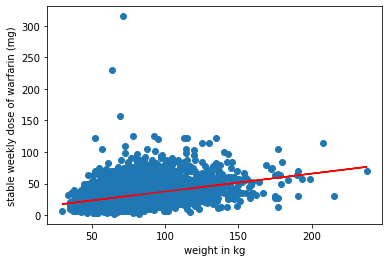

In [20]:
plt.scatter(weight,dose)
fit = np.poly1d(np.polyfit(weight,dose,deg=1))
plt.plot(weight,fit(weight),color='r')
plt.xlabel("weight in kg")
plt.ylabel("stable weekly dose of warfarin (mg)")
plt.savefig("weight_vs_dose")
plt.show()

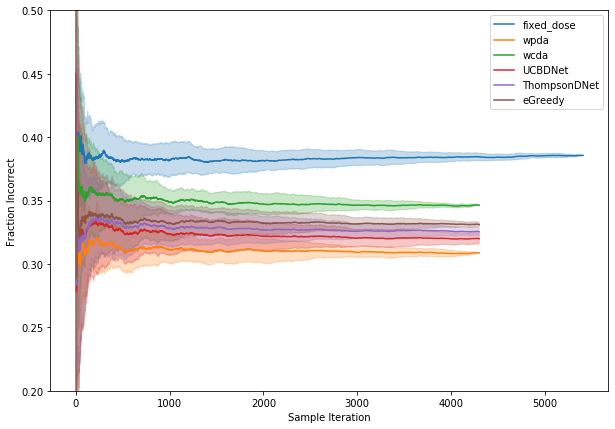

In [28]:
import numpy as np
import matplotlib.pyplot as plt
##Plotting
models = ["fixed_dose", "wpda", "wcda","UCBDNet", "ThompsonDNet","eGreedy"]
model_performance = []
colors = ["C%d" % i for i in range(10)]
plt.rcParams["figure.figsize"] = (10,7)
for i,model in enumerate(models):
    #data_list = np.load("data/"+ model+"_regret.npy")
    data_list = np.load("data/"+ model+"_frac_incorrect.npy")
    mean = np.mean(data_list,axis=0)
    model_performance.append(mean[-1])
    x = range(len(mean))
    std = np.std(data_list,axis=0)
    #print(np.mean(std))
    plt.plot(x,mean,color=colors[i],label=model)    
    plt.fill_between(x, mean - std, mean + std, color=colors[i],alpha=0.25)
plt.legend()
#plt.ylabel("Cumulative Regret")
plt.ylabel("Fraction Incorrect")
plt.xlabel("Sample Iteration")
plt.ylim([.2,.5])

#plt.savefig("regret_for_models")
plt.savefig("frac_incorrect")
plt.show()

Text(0, 0.5, 'Fraction Incorrect (averaged)')

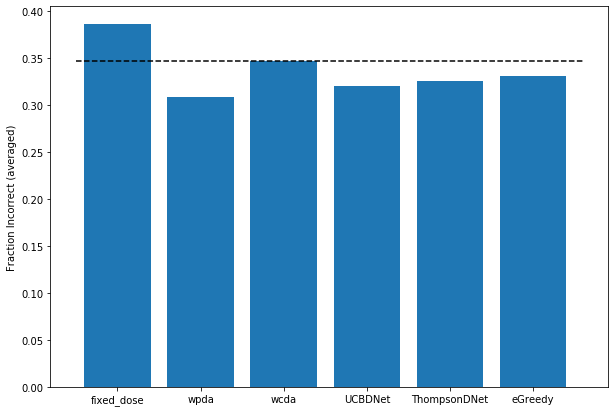

In [32]:
plt.bar(models,model_performance)
baseline = model_performance[models.index("wcda")]
plt.hlines(baseline,-.5,5.6,linestyles="dashed",color='k')
plt.ylabel("Fraction Incorrect (averaged)")